In [1]:
import quality_control as qc
import importlib
import numpy as np

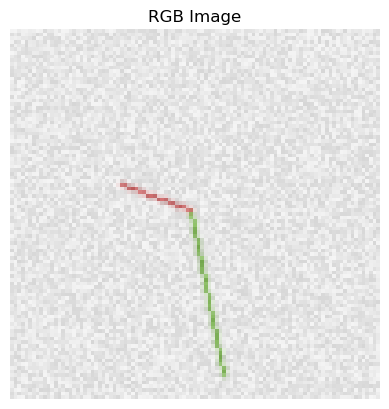

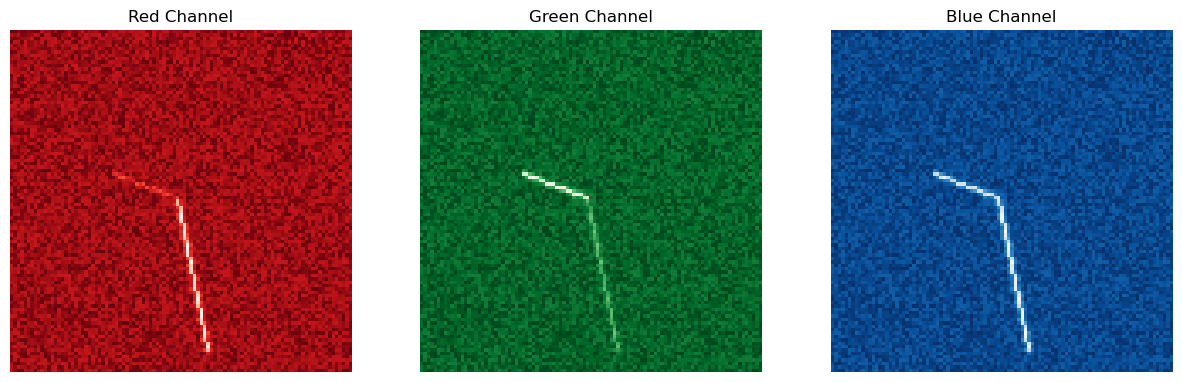

Test passed.


In [26]:

# Note: importlib.reload(qc) forces Jupyter to re-import your module (with your new changes).
importlib.reload(qc);
clock_RGB = qc.read_image('/Users/chenji/Desktop/project-1-Chenji-s_副本/clock_images/batch_0/clock_12.png'
, show=True)
#clock_RGB = qc.read_image('/Users/chenji/Desktop/project-1-Chenji-s_副本/testing/task2_7x7.png', show=True)
assert isinstance(clock_RGB, np.ndarray)
assert clock_RGB.shape == (101, 101, 3)
print('Test passed.')

In [33]:
clock_path='/Users/chenji/Desktop/project-1-Chenji-s_副本/clock_images/batch_0/clock_12.png'
clock_RGB = qc.read_image(clock_path)
hour_pixels, minute_pixels = qc.get_clock_hands(clock_RGB)
angle_hour = qc.get_angle(hour_pixels)
angle_minute = qc.get_angle(minute_pixels)

# 计算对齐误差
misalignment = qc.check_alignment(angle_hour, angle_minute)
misalignment

-12

In [37]:
import os
from datetime import datetime
importlib.reload(qc);
tolerance=5
folder_path='/Users/chenji/Desktop/project-1-Chenji-s_副本/clock_images/batch_0'
# 获取当前时间并格式化
current_time = datetime.now().strftime("%Y-%m-%d, %H:%M:%S")
    
    # 获取所有时钟文件（假设文件名格式为 clock_X.png）
clock_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]
    
    # 初始化计数
total_clocks = len(clock_files)
passing_clocks = 0
clocks_to_adjust = []
    
for clock_file in clock_files:
    # 读取每个时钟图片的路径
        clock_path = os.path.join(folder_path, clock_file)

    # 读取图片并提取时针和分针像素坐标
        clock_RGB = qc.read_image(clock_path)
        hour_pixels, minute_pixels = qc.get_clock_hands(clock_RGB)

 
    
    # 计算时针和分针的角度
        angle_hour = qc.get_angle(hour_pixels)
        angle_minute = qc.get_angle(minute_pixels)

        # 计算对齐误差
        misalignment = qc.check_alignment(angle_hour, angle_minute)
        
        # 检查误差是否在容差范围内
        if abs(misalignment) <= tolerance:
            passing_clocks += 1
        else:
            clocks_to_adjust.append((clock_file, misalignment))
    
    # 计算批次质量百分比
batch_quality = (passing_clocks / total_clocks) * 100
batch_quality

65.21739130434783

需要编写一个函数 collatz(m) 来实现柯拉茨猜想序列的步数计算。根据题目的描述，如果当前数字是偶数，就将其除以 2；如果是奇数，就乘以 3 加 1。最终会收敛到 1，你需要计算从初始数字 m 到 1 所需的步骤数。

以下是一个简单的 Python 实现：

python
复制代码

In [4]:

def collatz(m):
    steps = 0
    while m > 1:
        if m % 2 == 0:
            m = m // 2
        else:
            m = 3 * m + 1
        steps += 1
    return steps
print(collatz(15))  # 输出17
print(collatz(27))  # 输出111

17
111


写一个函数 even_sum(n)，用来计算不超过 n 的斐波那契序列中的偶数项之和。

我们可以根据斐波那契数列的生成规则（每一项是前两项之和）来生成序列，并在生成的过程中判断每一项是否是偶数，如果是偶数就将其加到结果中。

以下是该问题的一个可能解法：



In [8]:
def even_sum(n):
    total = 0
    fib1, fib2 = 1, 1  
    while fib2 <= n:
        if fib2 % 2 == 0:
            total += fib2
        fib1, fib2 = fib2, fib1 + fib2  
    return total

print(even_sum(8))       # 输出 10
print(even_sum(4000000)) # 输出 4613732


10
4613732


第三题要求编写一个函数 lowest_integer(f, fmin)，该函数需要接收两个参数：

一个递增的函数 f。
一个数值 fmin。
该函数返回满足 f(nmin) > fmin 的最小正整数 nmin。

实现思路：从 n = 1 开始，逐步增加 n，直到 f(n) 的值大于 fmin，然后返回这个最小的 n。

In [6]:
def lowest_integer(f, fmin):
    n = 1  # 从 n = 1 开始
    while f(n) <= fmin:  # 只要 f(n) 小于等于 fmin 就继续循环
        n += 1
    return n


def f(n):
    return 2 * n

print(lowest_integer(f, 10))  # 输出6

def f(n):
    return n**2 + 6 * n - 3

print(lowest_integer(f, 500))  # 输出20


6
20


In [7]:
import numpy as np

def matrix_op(X, n, m):
    A = np.zeros((n, n))
    B = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            A[i, j] = 2 * (i + X) + 3 * (j - X)
            B[i, j] = i - np.sqrt(j + X)

    B_power_m = np.linalg.matrix_power(B, m)

    result = np.dot(B_power_m, A)
    result = np.round(result, 2)
    return result

print(matrix_op(6, 2, 3))  # 输出应为 [[414.19, 163.24], [250.05, 98.55]]
print(matrix_op(2, 3, 2))  # 输出应为 [[  6.03,  33.89,  61.76], [  2.51,  11.06,  19.61], [ -1., -11.77, -22.54]]


[[414.19 163.24]
 [250.05  98.55]]
[[  6.03  33.89  61.76]
 [  2.51  11.06  19.61]
 [ -1.   -11.77 -22.54]]


In [10]:
import quality_control as qc
import importlib
import numpy as np
importlib.reload(qc)
path_1='/Users/chenji/Desktop/project-1-Chenji-s_副本/clock_images/batch_1/clock_14.png'
path_2='/Users/chenji/Desktop/project-1-Chenji-s_副本/clock_images/batch_1/clock_21.png'
clock_RGB1 = qc.read_image(path_1)
clock_RGB2 = qc.read_image(path_2)
 # 提取指针坐标
hour_pixels_1, minute_pixels_1 = qc.get_clock_hands(clock_RGB1)
hour_pixels_2, minute_pixels_2 = qc.get_clock_hands(clock_RGB2)
    
# 计算指针的角度
angle_hour_1 = qc.get_angle(hour_pixels_1)
angle_minute_1 = qc.get_angle(minute_pixels_1)
angle_hour_2 = qc.get_angle(hour_pixels_2)
angle_minute_2 = qc.get_angle(minute_pixels_2)
print(angle_hour_1)
print(angle_minute_1)
print(angle_hour_2)
print(angle_minute_2)

# 计算时针的角度差
hour_angle_diff = angle_hour_2 - angle_hour_1

# 将角度差转换为分钟
time_difference_minutes1 = abs(hour_angle_diff) /np.pi*720 # 每度2分钟

print(f"时针角度差对应的时间差为：{abs(time_difference_minutes1)} 分钟")
minute_angle_diff = angle_minute_2 - angle_minute_1
time_difference_minutes2 = abs(minute_angle_diff) /np.pi*60 # 每度2分钟
print(f"分针角度差对应的时间差为：{abs(time_difference_minutes2)} 分钟")


1.3568301076177205
3.2586264356380568
1.403947481001424
3.9751598056832065
时针角度差对应的时间差为：10.798506546513018 分钟
分针角度差对应的时间差为：13.684779327957575 分钟
